In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/l7/qksjftz12pz0s32y0l3jd4k4cyyb65/T/ipykernel_13848/3347640643.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1675782614.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1675782614.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/abc.py": 1675782614.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/io.py": 1675782614.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/stat.py": 1675782614.0, "/Libr

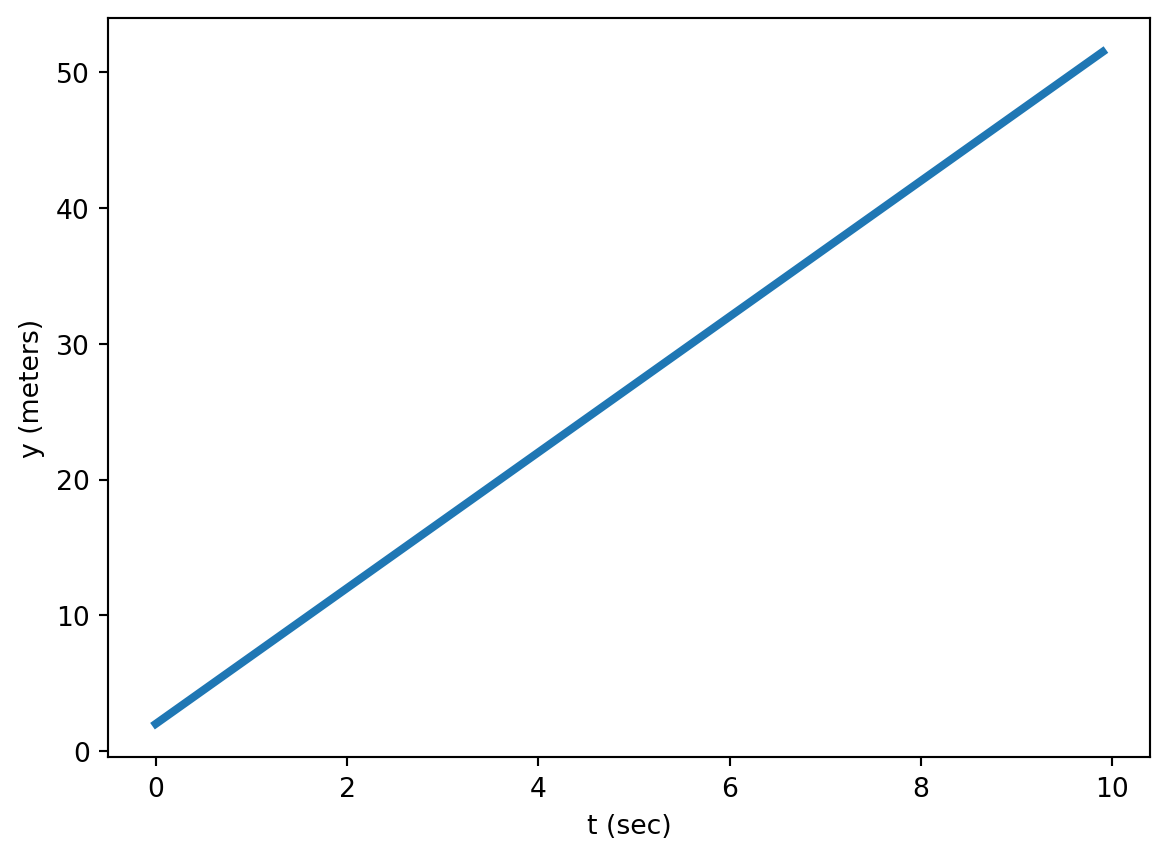

In [2]:
#| eval: true
#| echo: false
#| output: true

from matplotlib import pyplot as plt
from numpy import arange
t = arange(0,10,0.1)
y = 5 * t + 2

plt.plot(t,y,lw = 3)
plt.xlabel("t (sec)")
plt.ylabel("y (meters)")
plt.show()

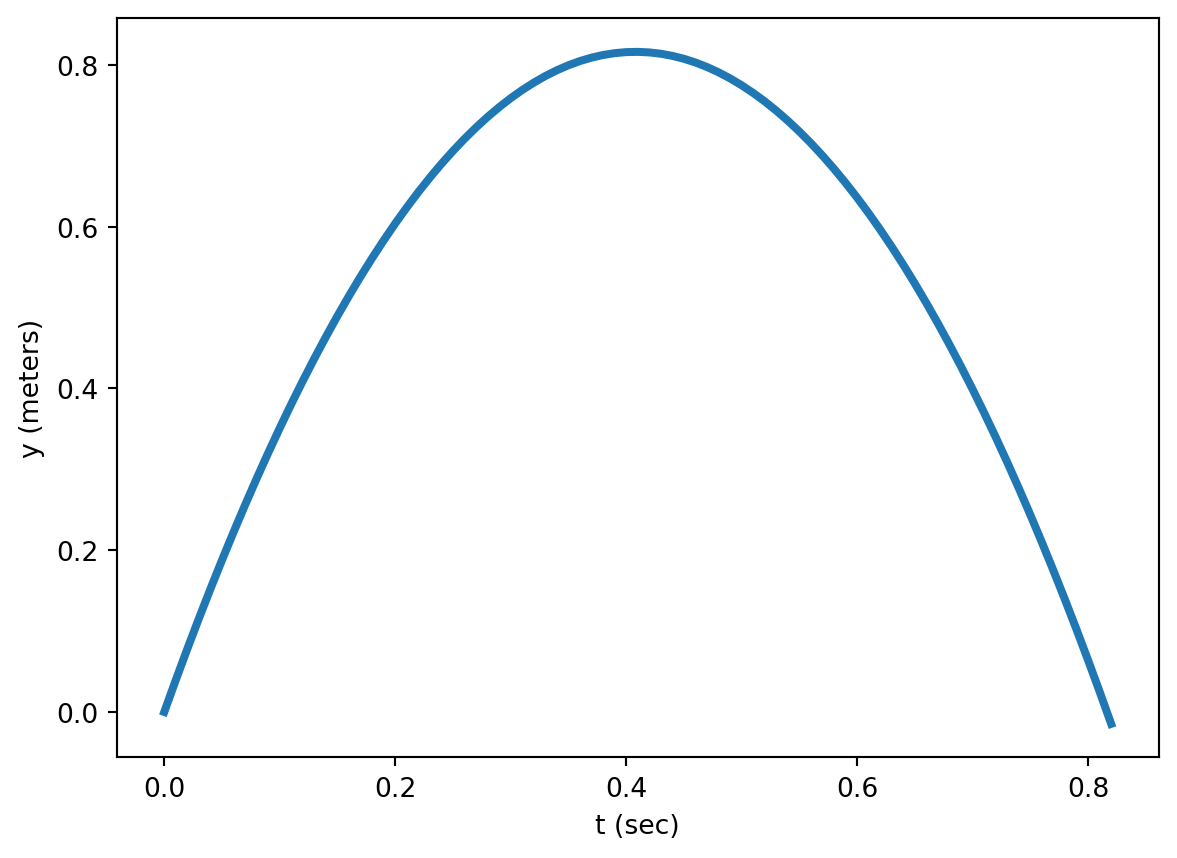

In [3]:
#| eval: true
#| echo: false
#| output: true

from matplotlib import pyplot as plt
from numpy import arange


def f(yi,vi,a,t):
    return yi + vi *t + 1/2 * a * t**2

def slopeTwoPoints(yi,vi,a,ta,tb):
    
    m = (f(yi,vi,a,tb) - f(yi,vi,a,ta)) / (tb - ta) 
    t1 = arange(0,tb,0.01)
    y1 = [yi + vi * tb + 1/2 *a * tb**2 for t in t1]
    plt.plot(t1,y1,'b--')

    y2 = arange(0,yi + vi * tb + 1/2 *a * tb**2,0.01)
    t2 = [tb for t in y2]
    plt.plot(t2,y2,'b--')

    t3 = arange(0,ta,0.01)
    y3 = [yi + vi * ta + 1/2 *a * ta**2 for t in t3]
    plt.plot(t3,y3,'r--')

    y4 = arange(0,yi + vi * ta + 1/2 *a * ta**2,0.01)
    t4 = [ta for t in y4]
    plt.plot(t4,y4,'r--')
    tRange = arange(0,0.5,0.01)
    y = m * tRange + f(yi,vi,a,ta) - ta * m
    plt.plot(tRange,y,'g-.')
    plt.ylim(0,1.1)

    font = {'family':'serif','color':'darkred','weight':'normal','size':16}
    plt.text(0.55, 1.0,f"slope = {m:5.2f}",fontdict = font)
    
a = -9.8
vi = 4
yi = 0
t = arange(0,0.83,0.01)
y = f(yi,vi,a,t)

plt.plot(t,y,lw = 3)

tb = 0.28
ta = 0.15

#m = 
#slopeTwoPoints(yi,vi,a,ta,tb)
#slopeTwoPoints(yi,vi,a,0.1,0.4)
plt.xlabel("t (sec)")
plt.ylabel("y (meters)")
plt.show()

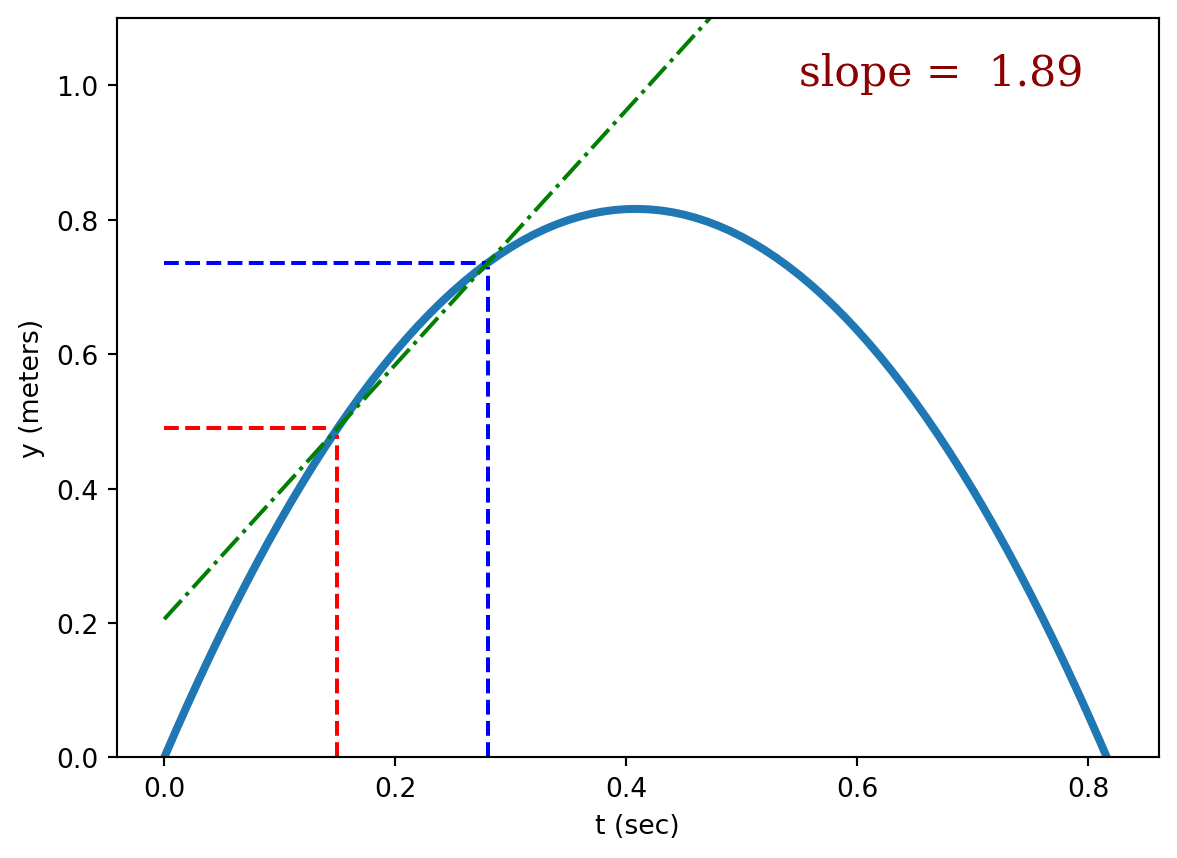

In [4]:
#| eval: true
#| echo: false
#| output: true

from matplotlib import pyplot as plt
from numpy import arange


def f(yi,vi,a,t):
    return yi + vi *t + 1/2 * a * t**2

def slopeTwoPoints(yi,vi,a,ta,tb):
    
    m = (f(yi,vi,a,tb) - f(yi,vi,a,ta)) / (tb - ta) 
    t1 = arange(0,tb,0.01)
    y1 = [yi + vi * tb + 1/2 *a * tb**2 for t in t1]
    plt.plot(t1,y1,'b--')

    y2 = arange(0,yi + vi * tb + 1/2 *a * tb**2,0.01)
    t2 = [tb for t in y2]
    plt.plot(t2,y2,'b--')

    t3 = arange(0,ta,0.01)
    y3 = [yi + vi * ta + 1/2 *a * ta**2 for t in t3]
    plt.plot(t3,y3,'r--')

    y4 = arange(0,yi + vi * ta + 1/2 *a * ta**2,0.01)
    t4 = [ta for t in y4]
    plt.plot(t4,y4,'r--')
    tRange = arange(0,0.5,0.01)
    y = m * tRange + f(yi,vi,a,ta) - ta * m
    plt.plot(tRange,y,'g-.')
    plt.ylim(0,1.1)

    font = {'family':'serif','color':'darkred','weight':'normal','size':16}
    plt.text(0.55, 1.0,f"slope = {m:5.2f}",fontdict = font)
    
a = -9.8
vi = 4
yi = 0
t = arange(0,0.83,0.01)
y = f(yi,vi,a,t)

plt.plot(t,y,lw = 3)

tb = 0.28
ta = 0.15

#m = 
slopeTwoPoints(yi,vi,a,ta,tb)
#slopeTwoPoints(yi,vi,a,0.1,0.4)
plt.xlabel("t (sec)")
plt.ylabel("y (meters)")
plt.show()

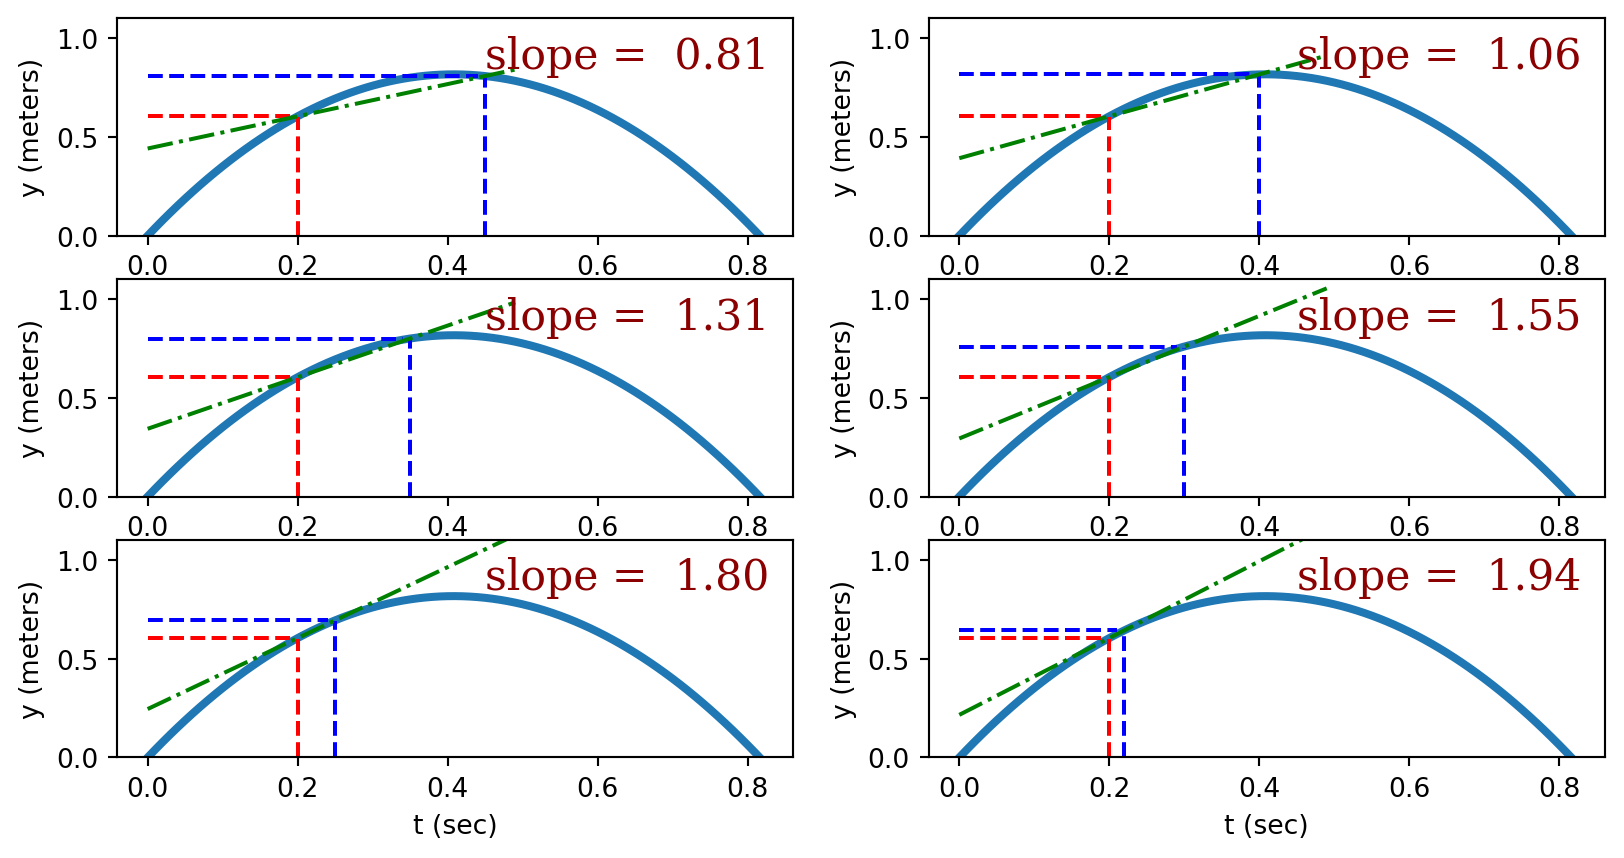

In [5]:
#| eval: true
#| echo: false
#| output: true

from matplotlib import pyplot as plt
from numpy import arange


def f(yi,vi,a,t):
    return yi + vi *t + 1/2 * a * t**2

def slopeTwoPoints(yi,vi,a,ta,tb,axes):
    
    m = (f(yi,vi,a,tb) - f(yi,vi,a,ta)) / (tb - ta) 
    t1 = arange(0,tb,0.01)
    y1 = [yi + vi * tb + 1/2 *a * tb**2 for t in t1]
    axes.plot(t1,y1,'b--')

    y2 = arange(0,yi + vi * tb + 1/2 *a * tb**2,0.01)
    t2 = [tb for t in y2]
    axes.plot(t2,y2,'b--')

    t3 = arange(0,ta,0.01)
    y3 = [yi + vi * ta + 1/2 *a * ta**2 for t in t3]
    axes.plot(t3,y3,'r--')

    y4 = arange(0,yi + vi * ta + 1/2 *a * ta**2,0.01)
    t4 = [ta for t in y4]
    axes.plot(t4,y4,'r--')
    tRange = arange(0,0.5,0.01)
    y = m * tRange + f(yi,vi,a,ta) - ta * m
    axes.plot(tRange,y,'g-.')
    axes.set_ylim(0,1.1)
    font = {'family':'serif','color':'darkred','weight':'normal','size':16}
    axes.text(0.45, 0.85,f"slope = {m:5.2f}",fontdict = font)
    axes.set_xlabel("t (sec)")
    axes.set_ylabel("y (meters)")

a = -9.8
vi = 4
yi = 0
t = arange(0,0.83,0.01)
y = f(yi,vi,a,t)


fig,axs = plt.subplots(3,2,figsize = (10,5))

axs[0,0].plot(t,y,lw = 3)
axs[0,1].plot(t,y,lw = 3)
axs[1,0].plot(t,y,lw = 3)
axs[1,1].plot(t,y,lw = 3)
axs[2,0].plot(t,y,lw = 3)
axs[2,1].plot(t,y,lw = 3)

tb = 0.40
ta = 0.25

#m = 
slopeTwoPoints(yi,vi,a,0.2,0.45,axs[0,0])
slopeTwoPoints(yi,vi,a,0.2,0.4,axs[0,1])
slopeTwoPoints(yi,vi,a,0.2,0.35,axs[1,0])
slopeTwoPoints(yi,vi,a,0.2,0.3,axs[1,1])
slopeTwoPoints(yi,vi,a,0.2,0.25,axs[2,0])
slopeTwoPoints(yi,vi,a,0.2,0.22,axs[2,1])

plt.show()

In [6]:
#| eval: false
#| echo: true

# Pendulum Parameters
T =           # period of the pendulum
un_T =        # uncertainty of the period of the pendulum
L =           # length of the pendulum
un_L =        # uncertainty of the length of the pendulum

# Compute volume of the room with uncertainty
g =          # Compute a value for g
un_g =       # Compute the uncertainty in g.
frac_g =     # Fractional uncertainty in g

print("The acceleration due to gravity is: {0:4.1f} +/- {1:3.1f} m/s^2. That's a fractional uncertainty of {2:6.2f}%.".format(g,un_g, 100 * frac_g))

In [7]:
#| eval: false
#| echo: true

import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
%matplotlib inline

periods = [,,,,] # Line 4
lengths = [,,,,]  # Line 5
gvalues = [,,,,]  # Line 6
un_length = [,,,,]  # Line 7
un_period = [,,,,]  # Line 8
un_g = [,,,,]  # Line 9

df = DataFrame(np.transpose([periods,un_period,lengths,un_length,gvalues,un_g]),columns = ["T (s)","δT (s)","L (m)","δL (m) ","g (m/s^2)","δg (m/s^2)"],index = list(range(1,4)))
display(df)

fig = plt.figure()            
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.errorbar(lengths,periods,yerr = un_period,xerr = un_length,fmt = 'go', capsize = 6)
ax1.set_aspect(1)
ax1.set_xlabel("L (meters)")
ax1.set_ylabel("T (seconds)")
ax1.set_title("Period vs Length for five pendulums")

ax2.errorbar(lengths,gvalues,yerr = un_g,fmt = 'ro', capsize = 6)
ax2.set_aspect(1)
ax2.set_xlabel("L (meters)")
ax2.set_ylabel("g (m/s^2)")
ax2.set_title("g vs Length for five pendulums")


plt.show()

In [8]:
#| eval: false
#| echo: true

t =            # Time in air in sec
un_t =         # Uncertainty of time measurement in sec
h =            # Height in meters
un_h =         # Uncertainty of height in meters
g =            # Calculate g using equation above
un_g =         # Calculate uncertainty in g
frac_g =       # Fractional uncertainty in g

print("g : {0:4.2f} +/- {1:4.2f} m/s^2.  That's a fractional uncertainty of {2:6.2f}%.".format(g,un_g,frac_g))

In [9]:
#| eval: false
#| echo: true

import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
%matplotlib inline

trial = [1,2,3,4,5,6,7,8,9,10]
fallDistances = [,,,,,,,,,]
un_distance = [,,,,,,,,,]
fallTimes = [,,,,,,,,,]
un_time = [,,,,,,,,,]
g = [,,,,,,,,,]  
un_g = [,,,,,,,,,]  

df = DataFrame(np.transpose([fallDistances,un_distance,fallTimes,un_times,gvalues,un_g]),columns = ["Fall Distance (m)","δd (m)","Fall Times (s)","δt (s) ","g (m/s^2)","δg (m/s^2)"],index = list(range(1,4)))
display(df)


fig = plt.figure()            
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


ax1.errorbar(trial,g,yerr = un_g,fmt = 'go', capsize = 6)
ax1.set_aspect(1)
ax1.set_xlabel("trial")
ax1.set_ylabel("g (m/s^2)")
ax1.set_title("Acceleration due to gravity for 10 experiments")


ax2.errorbar(fallTimes,fallDistances,yerr = un_distance,xerr=un_time,fmt = 'ro', capsize = 6)
ax2.set_aspect(1)
ax2.set_xlabel("Fall Times (sec)")
ax2.set_ylabel("Fall Distance (m)")
ax2.set_title("Fall Distance vs. Fall Time.")



plt.show()

In [10]:
#| eval: false
#| echo: true

from numpy import array
from statistics import mean, stdev
h =        # Height in meters
t_10 = array([ , , , , , , , , , ],float)    # Enter your ten time measurements
g =       # Calculate g for all time measurements
g_avg = mean(g)     # calculate mean
g_stdev = stdev(g)  # calculate standard deviation
print("The average value for g is: {0:4.1f}  m/s^2".format(g_avg))
print("The standard deviation for the g values is: {0:4.2f}  m/s^2".format(g_stdev))